In [162]:
import pandas

df = pandas.read_csv("ticsquimica.csv",delimiter=";",decimal=',')
df["DESCRITORES"] = df["DESCRITORES"].apply(lambda x: x*100.0)
df

,Nome,TICS,DESCRITORES
0,Uso de TIC por professores em aulas do ensino ...,3,66.666667
1,Um objeto de aprendizagem para o ensino de Quí...,1,33.333333
2,O Uso de Multi rrepresentação e Ciclos de Inte...,1,33.333333
3,O uso das tecnologias de informação e comunica...,1,66.666667
4,O Papel Do Youtube No Ensino De Ciências Para ...,1,66.666667
5,A Utilização de Vídeos Didáticos nas Aulas de ...,1,0.000000
6,Ensino de Modelos para o Átomo por Meio de Rec...,1,33.333333
7,Uma Arquitetura Pedagógica Apoiada Em Tecnolog...,2,100.000000
8,Construção de Objetos de Aprendizagem para o E...,1,33.333333
9,O Computador No Ensino De Química: Impressões ...,1,100.000000


([<matplotlib.axis.YTick at 0x7f862b1ef450>,
 <a list of 5 Text yticklabel objects>)

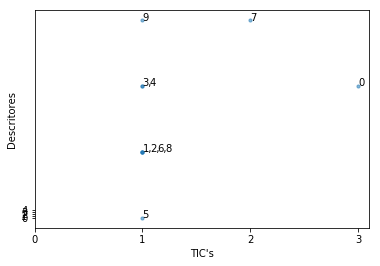

In [163]:
df.rename(columns={"TICS": "TIC's", "DESCRITORES": "Descritores", "Nome": "Título do Artigo"}, inplace=True)

import matplotlib.pyplot
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm

fig, ax = matplotlib.pyplot.subplots()
ax.scatter(df["TIC's"], df["Descritores"], alpha=0.53, s=10)

mapa={}
mapa2={}
valoresXY=[]

for i, txt in df.iterrows():
    x = []
    x.append(txt["TIC's"])
    x.append(txt["Descritores"])
    if (txt["TIC's"], txt["Descritores"]) not in mapa:
        mapa[(txt["TIC's"], txt["Descritores"])] = 0
        mapa2[(txt["TIC's"], txt["Descritores"])] = 0
    else:
        valor = mapa[(txt["TIC's"], txt["Descritores"])]
        mapa[(txt["TIC's"], txt["Descritores"])] = valor+1
        mapa2[(txt["TIC's"], txt["Descritores"])] = valor+1
    valoresXY.append(x)

for i, txt in df.iterrows():
    if mapa2[(txt["TIC's"], txt["Descritores"])] > 0:
        texto = str(i) + ","
    else:
        texto = str(i)
    ax.annotate(texto, (txt["TIC's"],txt["Descritores"]), 
                xytext=(txt["TIC's"] + (mapa[(txt["TIC's"], txt["Descritores"])]-
                                        mapa2[(txt["TIC's"], txt["Descritores"])]) * 0.07
                        ,txt["Descritores"]+0.03))
    mapa2[(txt["TIC's"], txt["Descritores"])]=mapa2[(txt["TIC's"], txt["Descritores"])]-1
    
matplotlib.pyplot.xlabel("TIC's")
matplotlib.pyplot.ylabel('Descritores')
matplotlib.pyplot.xticks(np.arange(0, 4, step=1))
matplotlib.pyplot.yticks(np.arange(0, 5, step=1))

([<matplotlib.axis.XTick at 0x7f862b2e0650>,
 <a list of 10 Text xticklabel objects>)

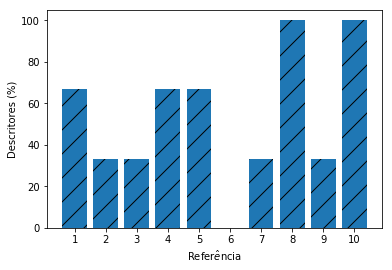

In [165]:
matplotlib.pyplot.bar(np.arange(1,11,step=1), df["Descritores"],hatch="/")

# -*- coding: utf-8 -*-

matplotlib.pyplot.xlabel(r'Refer$\^e$ncia')
matplotlib.pyplot.ylabel("Descritores (%)")
matplotlib.pyplot.xticks(np.arange(1, 11, step=1))